In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from pandas_datareader import data as pdr
import yfinance as yf
import seaborn as sns
yf.pdr_override()

# Loading Algorithm

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

# Regularization
from sklearn.linear_model import Lasso #because we are selecting features.
from sklearn.linear_model import ElasticNet

# Decision Tree
from sklearn.tree import DecisionTreeRegressor #worst performer because there is no pruning?

# ENSEMBLE

## Bagging (bootstrap aggregation) #likely to overfit too because its underlying uses decision tree 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

## Boosting
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor


# for cross-validation
from sklearn.model_selection import cross_val_score #perf, mean, variance and std error
from sklearn.model_selection import KFold # we can tune it as hyperparameter
from sklearn.model_selection import GridSearchCV

# for assessment
from sklearn import metrics
from sklearn.metrics import mean_squared_error

# for Feature Selection
from sklearn.feature_selection import chi2, f_regression
from sklearn.feature_selection import SelectKBest

# KMeans
from sklearn.cluster import KMeans

#import dependency for time series modelling

import statsmodels.tsa.arima.model as stats
import statsmodels.api as sm

from pandas.plotting import scatter_matrix #plot of correlation matrix and kernel density plotting

# for Pre-processing (Feature Engineering)
from sklearn.preprocessing import StandardScaler

ignore warning

In [62]:
capital = 1e5
start_date = dt.datetime(2004,11,1)
end_date = dt.datetime(2023,11,1)

spy = pdr.get_data_yahoo("SPY", start = start_date, end = end_date)
Y = np.log(spy["Adj Close"]).diff(1)
Y.name = "Y_pred"

tnx_ticker = "^TNX"

tnx_data = yf.download(tnx_ticker, start=start_date, end=end_date)

X0 = np.log(tnx_data["Adj Close"])
X0 = X0.ffill()
X0.name = "10years futures"

vix_ticker = "^VIX"

vix = yf.download(vix_ticker, start=start_date, end=end_date)

X0_1 = np.log(vix["Adj Close"])
X0_1 = X0_1.ffill()
X0_1.name = "vix"

X1 = np.log(spy["Volume"])
X2 =\
(pd.concat([Y.
            diff(i) 
            for i in [3,6,12]], 
                   axis = 1
          )

)
X2.columns = ["SPY_3", "SPY_6", "SPY_12"]

X3 =\
(
    pd.concat([X1.shift(i)
               #.diff(i) 
               for i in [3,6,12]],
                      axis =1
             )
)
X3.columns = ["Volume_3", "Volume_6", "Volume_12"]

X =\
(
        pd.concat([X0, X0_1, X1, X2, X3],
                 axis = 1)
)




[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [101]:
spy

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-11-01,113.559998,113.839996,113.199997,113.510002,78.617973,36720900
2004-11-02,113.669998,114.570000,113.220001,113.550003,78.645660,56210000
2004-11-03,115.029999,115.360001,114.239998,114.980003,79.636047,76960200
2004-11-04,114.779999,116.669998,114.680000,116.550003,80.723457,55350300
2004-11-05,117.050003,117.639999,116.489998,117.279999,81.229034,63287200
...,...,...,...,...,...,...
2023-10-25,421.890015,421.920013,417.019989,417.549988,417.549988,94223200
2023-10-26,416.450012,417.329987,411.600006,412.549988,412.549988,115156800
2023-10-27,414.190002,414.600006,409.209991,410.679993,410.679993,107367700


In [102]:
tnx_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-11-01,4.050,4.095,4.036,4.090,4.090,0
2004-11-02,4.090,4.103,4.074,4.075,4.075,0
2004-11-03,4.134,4.160,4.065,4.070,4.070,0
2004-11-04,4.062,4.072,4.038,4.068,4.068,0
2004-11-05,4.070,4.243,4.070,4.186,4.186,0
...,...,...,...,...,...,...
2023-10-25,4.851,4.959,4.851,4.953,4.953,0
2023-10-26,4.964,4.983,4.842,4.845,4.845,0
2023-10-27,4.866,4.892,4.843,4.845,4.845,0


In [103]:
vix

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-11-01,16.430000,16.760000,16.180000,16.270000,16.270000,0
2004-11-02,15.990000,16.320000,15.210000,16.180000,16.180000,0
2004-11-03,15.050000,15.180000,13.790000,14.040000,14.040000,0
2004-11-04,13.830000,14.020000,12.950000,13.970000,13.970000,0
2004-11-05,13.670000,14.100000,13.230000,13.840000,13.840000,0
...,...,...,...,...,...,...
2023-10-25,19.389999,21.240000,18.860001,20.190001,20.190001,0
2023-10-26,21.780001,21.959999,20.219999,20.680000,20.680000,0
2023-10-27,20.389999,22.070000,19.719999,21.270000,21.270000,0


In [105]:
spy_vix = pd.concat([spy["Adj Close"], vix["Adj Close"]], axis = 1)
spy_tnx = pd.concat([spy["Adj Close"], tnx_data["Adj Close"]], axis = 1)
spy_vix_diff5 = pd.concat([spy["Adj Close"].diff(5).dropna(), vix["Adj Close"].diff(5).dropna()], axis = 1)
spy_tnx_diff5 = pd.concat([spy["Adj Close"].diff(5).dropna(), tnx_data["Adj Close"].diff(5).dropna()], axis = 1)

In [109]:
spy_vix.dropna()

,Adj Close,Adj Close
Date,,
2004-11-01,78.617973,16.270000
2004-11-02,78.645660,16.180000
2004-11-03,79.636047,14.040000
2004-11-04,80.723457,13.970000
2004-11-05,81.229034,13.840000
...,...,...
2023-10-25,417.549988,20.190001
2023-10-26,412.549988,20.680000
2023-10-27,410.679993,21.270000


In [114]:
regime_dict_df1

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Date,,,,,,,,,,,,,,,,,,
2004-11-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2004-11-02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2004-11-03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2004-11-04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2004-11-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2023-10-26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2023-10-27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [113]:
spy_vix["cluster_label"].value_counts()

cluster_label
0    4767
1      16
Name: count, dtype: int64

In [117]:
len(inertia_list)

37

/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


 
iteration number 2 done!


/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


 
iteration number 3 done!


/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


 
iteration number 4 done!


/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


 
iteration number 5 done!


/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


 
iteration number 6 done!


/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


 
iteration number 7 done!


/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


 
iteration number 8 done!


/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


 
iteration number 9 done!


/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


 
iteration number 10 done!


/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


 
iteration number 11 done!


/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


 
iteration number 12 done!


/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


 
iteration number 13 done!


/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


 
iteration number 14 done!


/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


 
iteration number 15 done!


/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


 
iteration number 16 done!


/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


 
iteration number 17 done!


/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


 
iteration number 18 done!


/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


 
iteration number 19 done!


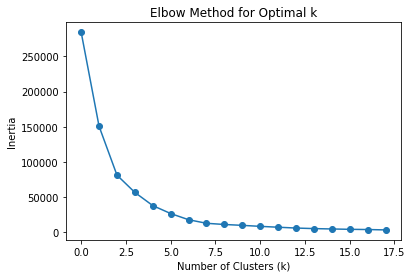

The optimal number of clusters based on the elbow method is: 3


3
1    4337
2     315
0     131
Name: count, dtype: int64

In [120]:
regime_dict1 = {}

inertia_list1 = []

#clustering to detect regime change 
max_clusters = len(pd.unique(X.index.year)) #10

X_scaled = TimeSeriesScalerMeanVariance().fit_transform(spy_vix)
X_scaled = X_scaled.reshape(X_scaled.shape[0], -1)

# Compute DTW distances
dtw_distances = pairwise_distances(X_scaled, metric=dtw)

for num_cluster in range(2, max_clusters):
    kmeans_model = KMeans(n_clusters=num_cluster, random_state=627)
    kmeans_model.fit(dtw_distances)
    inertia_list1.append(kmeans_model.inertia_)
    spy_vix['cluster_label'] =\
    (kmeans_model
             .fit_predict(dtw_distances)
    )
    
    regime_dict1[num_cluster] = spy_vix['cluster_label']
    print(" ")
    print("iteration number {} done!".format(num_cluster))
    
    
# Plot the elbow curve
plt.plot(np.arange(len(inertia_list1)), inertia_list1, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

def find_optimal_clusters(inertia_values):
    # Calculate the second derivative of the inertia values
    second_derivative = np.gradient(np.gradient(inertia_values))
    
    # Find the index of the maximum value in the second derivative
    optimal_index = np.argmax(second_derivative)
    
    # The optimal number of clusters is the index + 2 (since indexing starts from 0 and we start from k=2)
    optimal_clusters = optimal_index + 2
    
    return optimal_clusters

# Use the function to find the optimal number of clusters
optimal_clusters1 = find_optimal_clusters(inertia_list1)

print(f"The optimal number of clusters based on the elbow method is: {optimal_clusters1}")

regime_dict_df1 = pd.DataFrame(regime_dict1, columns = regime_dict1.keys())
regime_dict_df1[optimal_clusters1].value_counts()

In [122]:
regime_dict_df1[3]

Date
2004-11-01    1
2004-11-02    1
2004-11-03    1
2004-11-04    1
2004-11-05    1
             ..
2023-10-25    1
2023-10-26    1
2023-10-27    1
2023-10-30    1
2023-10-31    1
Name: 3, Length: 4783, dtype: int32

<Axes: xlabel='Date'>

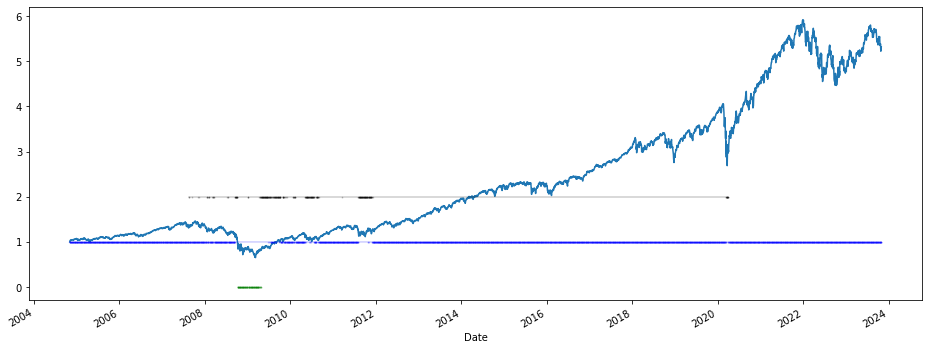

In [123]:
Y.cumsum().apply(np.exp).plot(figsize = [16, 6])

regime_dict_df1[optimal_clusters1][regime_dict_df1[optimal_clusters1] == 0].plot(figsize = [16, 6],
          marker = "^", 
          color = "green",
          markersize = 1,
          alpha = 0.2
         )

regime_dict_df1[optimal_clusters1][regime_dict_df1[optimal_clusters1] == 1].plot(figsize = [16, 6],
          marker = "^", 
          color = "blue",
          markersize = 1,
          alpha = 0.2
         )

regime_dict_df1[optimal_clusters1][regime_dict_df1[optimal_clusters1] == 2].plot(figsize = [16, 6],
          marker = "^", 
          color = "black",
          markersize = 1,
          alpha = 0.2
         )


In [124]:
regime_dict_df1.to_excel("regime_dict_spy_vix.xlsx")

In [133]:
#DTW doesn't work on spy_tnx data as the pairwise function produces Nan values

regime_dict2 = {}

inertia_list2 = []

#clustering to detect regime change 
max_clusters = len(pd.unique(X.index.year)) #10

X_scaled = TimeSeriesScalerMeanVariance().fit_transform(spy_tnx)
X_scaled = X_scaled.reshape(X_scaled.shape[0], -1)

# Compute DTW distances
dtw_distances = pairwise_distances(X_scaled, metric=dtw)

for num_cluster in range(2, max_clusters):
    kmeans_model = KMeans(n_clusters=num_cluster, random_state=627)
    kmeans_model.fit(dtw_distances)
    inertia_list2.append(kmeans_model.inertia_)
    spy_tnx['cluster_label'] =\
    (kmeans_model
             .fit_predict(dtw_distances)
    )
    
    regime_dict2[num_cluster] = spy_tnx['cluster_label']
    print(" ")
    print("iteration number {} done!".format(num_cluster))
    
    
# Plot the elbow curve
plt.plot(np.arange(len(inertia_list2)), inertia_list2, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

def find_optimal_clusters(inertia_values):
    # Calculate the second derivative of the inertia values
    second_derivative = np.gradient(np.gradient(inertia_values))
    
    # Find the index of the maximum value in the second derivative
    optimal_index = np.argmax(second_derivative)
    
    # The optimal number of clusters is the index + 2 (since indexing starts from 0 and we start from k=2)
    optimal_clusters = optimal_index + 2
    
    return optimal_clusters

# Use the function to find the optimal number of clusters
optimal_clusters2 = find_optimal_clusters(inertia_list2)

print(f"The optimal number of clusters based on the elbow method is: {optimal_clusters2}")

regime_dict_df2 = pd.DataFrame(regime_dict2, columns = regime_dict2.keys())
regime_dict_df2[optimal_clusters2].value_counts()

regime_dict_df2.to_excel("regime_dict_spy_tnx.xlsx")

/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


 
iteration number 2 done!


/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Pos

 
iteration number 3 done!


/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Pos

 
iteration number 4 done!


/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Pos

 
iteration number 5 done!


/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (6). Pos

 
iteration number 6 done!


/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (7). Pos

 
iteration number 7 done!


/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (8). Pos

 
iteration number 8 done!


/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (9). Pos

 
iteration number 9 done!


/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). P

 
iteration number 10 done!


/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (11). P

 
iteration number 11 done!


/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (12). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (12). P

 
iteration number 12 done!


/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (13). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (13). P

 
iteration number 13 done!


/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (14). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (14). P

 
iteration number 14 done!


/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (15). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (15). P

 
iteration number 15 done!


/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (16). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (16). P

 
iteration number 16 done!


/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (17). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (17). P

 
iteration number 17 done!


/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (18). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (18). P

 
iteration number 18 done!


/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (19). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/kennong/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (19). P

 
iteration number 19 done!


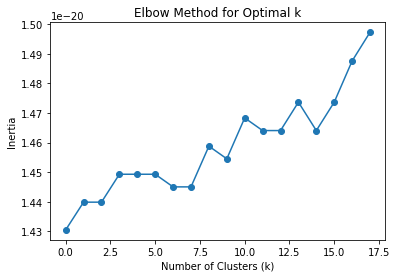

The optimal number of clusters based on the elbow method is: 17


17
3    2800
0    1978
Name: count, dtype: int64

In [126]:
regime_dict3 = {}

inertia_list3 = []

#clustering to detect regime change 
max_clusters = len(pd.unique(X.index.year)) #10

X_scaled = TimeSeriesScalerMeanVariance().fit_transform(spy_vix_diff5)
X_scaled = X_scaled.reshape(X_scaled.shape[0], -1)

# Compute DTW distances
dtw_distances = pairwise_distances(X_scaled, metric=dtw)

for num_cluster in range(2, max_clusters):
    kmeans_model = KMeans(n_clusters=num_cluster, random_state=627)
    kmeans_model.fit(dtw_distances)
    inertia_list3.append(kmeans_model.inertia_)
    spy_vix_diff5['cluster_label'] =\
    (kmeans_model
             .fit_predict(dtw_distances)
    )
    
    regime_dict3[num_cluster] = spy_vix_diff5['cluster_label']
    print(" ")
    print("iteration number {} done!".format(num_cluster))
    
    
# Plot the elbow curve
plt.plot(np.arange(len(inertia_list3)), inertia_list3, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

def find_optimal_clusters(inertia_values):
    # Calculate the second derivative of the inertia values
    second_derivative = np.gradient(np.gradient(inertia_values))
    
    # Find the index of the maximum value in the second derivative
    optimal_index = np.argmax(second_derivative)
    
    # The optimal number of clusters is the index + 2 (since indexing starts from 0 and we start from k=2)
    optimal_clusters = optimal_index + 2
    
    return optimal_clusters

# Use the function to find the optimal number of clusters
optimal_clusters3 = find_optimal_clusters(inertia_list3)

print(f"The optimal number of clusters based on the elbow method is: {optimal_clusters3}")

regime_dict_df3 = pd.DataFrame(regime_dict3, columns = regime_dict3.keys())
regime_dict_df3[optimal_clusters3].value_counts()

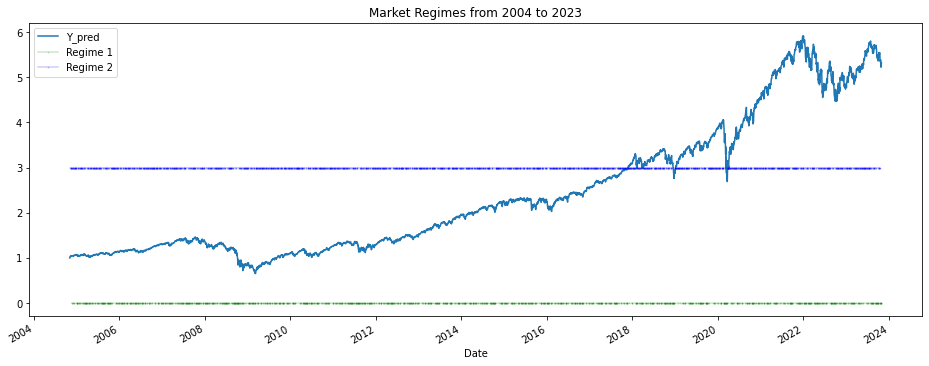

In [130]:
Y.cumsum().apply(np.exp).plot(figsize = [16, 6])

regime_dict_df3[optimal_clusters3][regime_dict_df3[optimal_clusters3] == 0].plot(figsize = [16, 6],
          marker = "^", 
          color = "green",
          markersize = 1,
          alpha = 0.2,
        label = "Regime 1"
         )

regime_dict_df3[optimal_clusters3][regime_dict_df3[optimal_clusters3] == 3].plot(figsize = [16, 6],
          marker = "^", 
          color = "blue",
          markersize = 1,
          alpha = 0.2,
        label = "Regime 2"
         )


plt.title("Market Regimes from 2004 to 2023")
plt.legend()
plt.show()

In [131]:
regime_dict_df3.to_excel("regime_dict_spy_vix_diff5.xlsx")

In [132]:
#DTW doesn't work on spy_tnx_diff5 data as the pairwise function produces Nan values


regime_dict4 = {}

inertia_list4 = []

#clustering to detect regime change 
max_clusters = len(pd.unique(X.index.year)) #10

X_scaled = TimeSeriesScalerMeanVariance().fit_transform(spy_tnx_diff5)
X_scaled = X_scaled.reshape(X_scaled.shape[0], -1)

#Compute DTW distances
dtw_distances = pairwise_distances(X_scaled, metric=dtw)

for num_cluster in range(2, max_clusters):
    kmeans_model = KMeans(n_clusters=num_cluster, random_state=627)
    kmeans_model.fit(dtw_distances)
    inertia_list4.append(kmeans_model.inertia_)
    spy_tnx_diff5['cluster_label'] =\
    (kmeans_model
             .fit_predict(dtw_distances)
    )
    
    regime_dict4[num_cluster] = spy_tnx_diff5['cluster_label']
    print(" ")
    print("iteration number {} done!".format(num_cluster))
    
    
#Plot the elbow curve
plt.plot(np.arange(len(inertia_list4)), inertia_list4, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

def find_optimal_clusters(inertia_values):
    # Calculate the second derivative of the inertia values
    second_derivative = np.gradient(np.gradient(inertia_values4))
    
    # Find the index of the maximum value in the second derivative
    optimal_index = np.argmax(second_derivative)
    
    # The optimal number of clusters is the index + 2 (since indexing starts from 0 and we start from k=2)
    optimal_clusters = optimal_index + 2
    
    return optimal_clusters

#Use the function to find the optimal number of clusters
optimal_clusters4 = find_optimal_clusters(inertia_list)

print(f"The optimal number of clusters based on the elbow method is: {optimal_clusters4}")

regime_dict_df4 = pd.DataFrame(regime_dict4, columns = regime_dict4.keys())
regime_dict_df4[optimal_clusters4].value_counts()

regime_dict_df4.to_excel("regime_dict_spy_tnx_diff5.xlsx")